## ADS

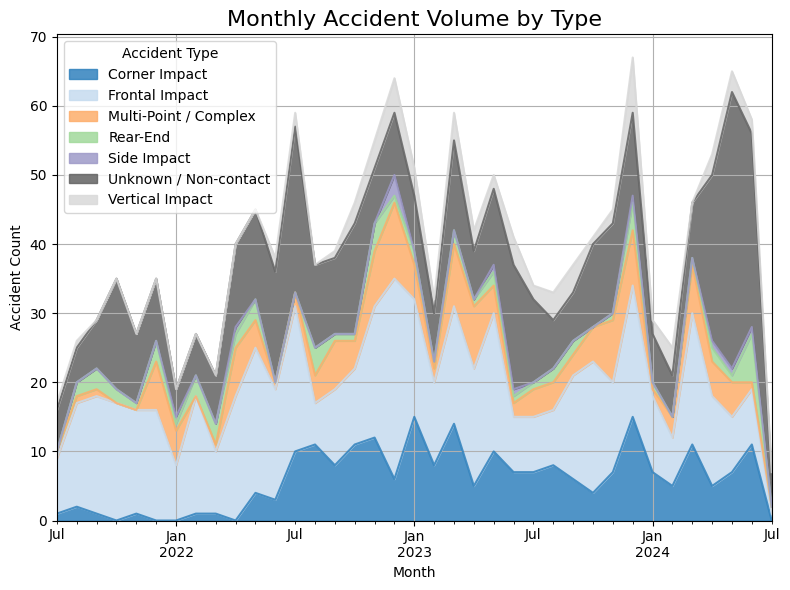

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Import numpy for percentile calculation
df= pd.read_csv (r'/content/4 ADAS.csv')
# Load and prepare data

df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Group by Incident Date and Accident Type
ts_df = df.groupby(['Incident Date', 'Accident Type']).size().reset_index(name='Count')

# Convert to monthly frequency
ts_df['Month'] = ts_df['Incident Date'].dt.to_period('M').dt.to_timestamp()
monthly_df = ts_df.groupby(['Month', 'Accident Type'])['Count'].sum().reset_index()


# Pivot for stacked area chart
pivot_df = monthly_df.pivot(index='Month', columns='Accident Type', values='Count').fillna(0)

# Plot stacked area chart
plt.figure(figsize=(8, 6))
pivot_df.plot.area(stacked=True, colormap='tab20c', alpha=0.85, ax= plt.gca())

plt.title('Monthly Accident Volume by Type', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.legend(title='Accident Type', loc='upper left')
plt.grid(True)
plt.tight_layout()
# plt.savefig('monthly_accident_volume_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()



<Figure size 1200x800 with 0 Axes>

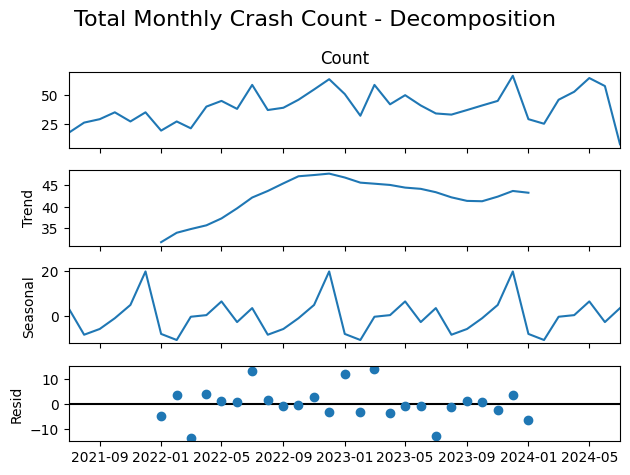

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and prepare dat
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Group by Incident Date and count total crashes
ts_df = df.groupby(['Incident Date']).size().reset_index(name='Count')

# Convert to monthly frequency
ts_df['Month'] = ts_df['Incident Date'].dt.to_period('M').dt.to_timestamp()
monthly_df = ts_df.groupby('Month')['Count'].sum().reset_index()

# Set Month as index
monthly_df.set_index('Month', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(monthly_df['Count'], model='additive', period=12)

# Plot decomposition

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Total Monthly Crash Count - Decomposition', fontsize=16)
plt.tight_layout()
# plt.savefig('monthly_crash_count_decomposition_ADS.png', dpi=300, bbox_inches='tight')
plt.show()

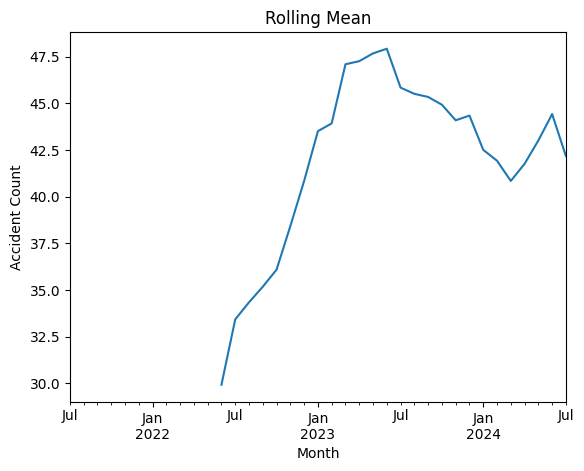

In [ ]:
# New Analysis
monthly_df['rolling_mean'] = monthly_df['Count'].rolling(window=12).mean()
monthly_df['rolling_mean'].plot(title='Rolling Mean')
plt.ylabel('Accident Count')
# plt.savefig('rolling_mean_ADS.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

# # import numpy as np
# monthly_df['Count'] = np.log1p(monthly_df['Count']+1)

monthly_df['Count'] = np.log(monthly_df['Count'])

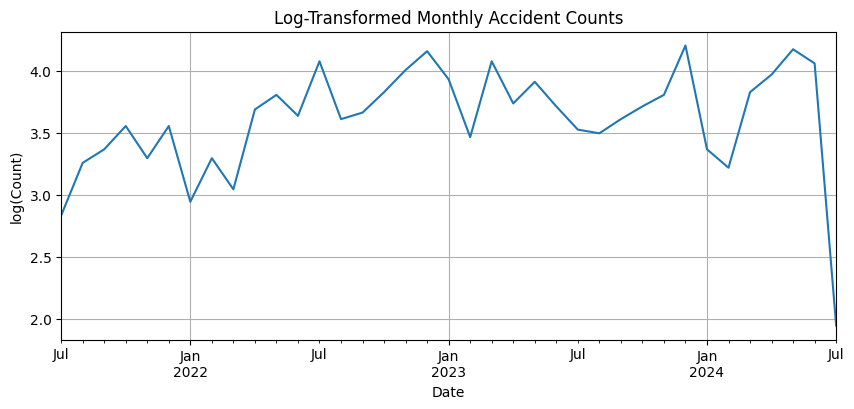

In [ ]:
import matplotlib.pyplot as plt

monthly_df['Count'].plot(figsize=(10, 4), title='Log-Transformed Monthly Accident Counts')
plt.ylabel('log(Count)')
plt.xlabel('Date')
plt.grid(True)
# plt.savefig('log_transformed_monthly_accident_counts_ADS.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
adf_result = adfuller(monthly_df['Count'].dropna())
kpss_result = kpss(monthly_df['Count'].dropna(), regression='c')


print(f'Augmented Dickey-Fuller Test (ADF):')
print(f'  ADF Statistic: {adf_result[0]:.4f}')
print(f'  p-value: {adf_result[1]:.4f}')
print('  Critical Values:')
for key, value in adf_result[4].items():
    print(f'    {key}: {value:.4f}')

print(f'\nKwiatkowski-Phillips-Schmidt-Shin Test (KPSS):')
print(f'  KPSS Statistic: {kpss_result[0]:.4f}')
print(f'  p-value: {kpss_result[1]:.4f}')
print('  Critical Values:')
for key, value in kpss_result[3].items():
    print(f'    {key}: {value:.4f}')

Augmented Dickey-Fuller Test (ADF):
  ADF Statistic: -1.6505
  p-value: 0.4568
  Critical Values:
    1%: -3.6699
    5%: -2.9641
    10%: -2.6212

Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS):
  KPSS Statistic: 0.3312
  p-value: 0.1000
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390


/tmp/ipython-input-1622785974.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(monthly_df['Count'].dropna(), regression='c')


In [ ]:

monthly_df['Count_diff'] = monthly_df['Count'].diff().dropna()

In [ ]:
adf_result = adfuller(monthly_df['Count_diff'].dropna())
kpss_result = kpss(monthly_df['Count_diff'].dropna(), regression='c')


print(f'Augmented Dickey-Fuller Test (ADF):')
print(f'  ADF Statistic: {adf_result[0]:.4f}')
print(f'  p-value: {adf_result[1]:.4f}')
print('  Critical Values:')
for key, value in adf_result[4].items():
    print(f'    {key}: {value:.4f}')

print(f'\nKwiatkowski-Phillips-Schmidt-Shin Test (KPSS):')
print(f'  KPSS Statistic: {kpss_result[0]:.4f}')
print(f'  p-value: {kpss_result[1]:.4f}')
print('  Critical Values:')
for key, value in kpss_result[3].items():
    print(f'    {key}: {value:.4f}')

Augmented Dickey-Fuller Test (ADF):
  ADF Statistic: -4.8162
  p-value: 0.0001
  Critical Values:
    1%: -3.6535
    5%: -2.9572
    10%: -2.6176

Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS):
  KPSS Statistic: 0.2705
  p-value: 0.1000
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390


/tmp/ipython-input-3850350980.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(monthly_df['Count_diff'].dropna(), regression='c')


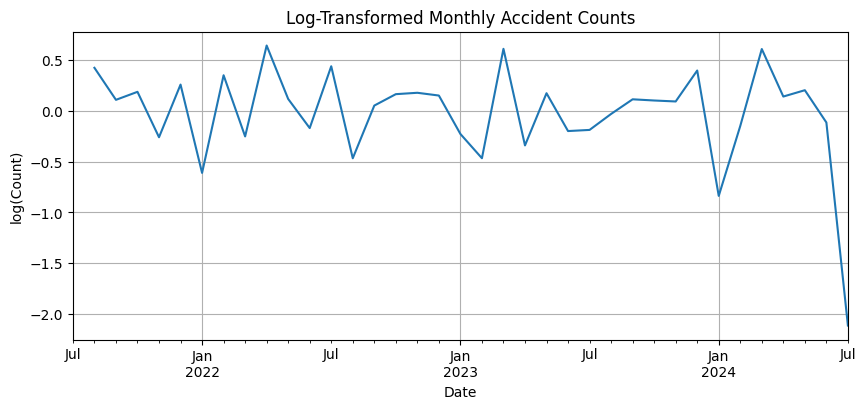

In [ ]:

monthly_df['Count_diff'].plot(figsize=(10, 4), title='Log-Transformed Monthly Accident Counts')
# plt.ylabel('log(Count + 1)')
plt.ylabel('log(Count)')
plt.xlabel('Date')
plt.grid(True)
# plt.savefig('log_transformed_monthly_accident_counts_diff_ADS.png', dpi=300, bbox_inches='tight')
plt.show()

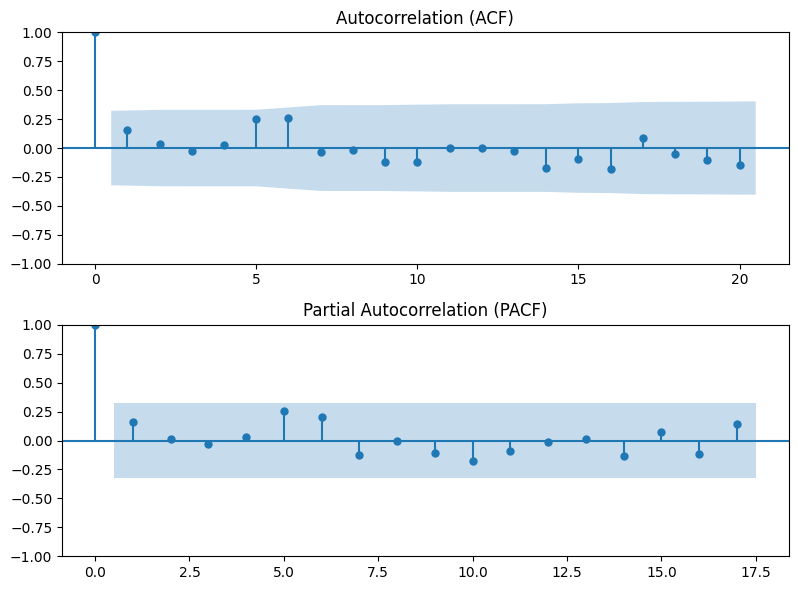

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(8,6))

# Autocorrelation Function
# Reduce the number of lags to be less than the number of observations
plot_acf(monthly_df['Count'], lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)')

# Partial Autocorrelation Function
# Reduce the number of lags and ensure it's appropriate for the sample size
# The number of lags for PACF must be less than half the sample size
nobs = len(monthly_df['Count'].dropna()) # Get the number of observations
lags_pacf = min(20, int(nobs / 2) - 1) # Ensure lags is less than half the sample size
if lags_pacf > 0:
    plot_pacf(monthly_df['Count'], lags=lags_pacf, ax=axes[1], method='ywm')
    axes[1].set_title('Partial Autocorrelation (PACF)')
else:
    axes[1].set_title('Not enough data to plot PACF with sufficient lags')


plt.tight_layout()
# plt.savefig('acf_pacf_ADS.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#### The last one



import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
import itertools
import warnings
warnings.filterwarnings("ignore")

# --- Step 1: Monthly Aggregation ---
monthly_total = monthly_df.groupby('Month')['Count'].sum().reset_index()
monthly_total.columns = ['ds', 'y']
monthly_total['ds'] = pd.to_datetime(monthly_total['ds'])
monthly_total.set_index('ds', inplace=True)

# --- Step 2: Train/Test Split
train = monthly_total[monthly_total.index < '2023-08-01']
test = monthly_total[(monthly_total.index >= '2023-08-01')]

# --- Step 3: SARIMA Parameter Grid ---
p  = q = range(0, 3)
d= range(1,3)
P = D = Q = range(0, 3)
s = 12  # Monthly seasonality
param_grid = list(itertools.product(p, d, q, P, D, Q))

results = []
failed = []

# --- Step 4: Model Loop ---
for params in param_grid:
    order = (params[0], params[1], params[2])
    seasonal_order = (params[3], params[4], params[5], s)

    try:
        model = SARIMAX(train['y'],
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results_fit = model.fit(disp=False)

        # Forecast on log scale
        forecast_log = results_fit.forecast(steps=len(test))
        forecast_log.index = test.index

        # # Invert to real scale
        # forecast_real = np.expm1(forecast_log) -1
        # test_real = np.expm1(test['y']) -1

         # Invert to real scale
        forecast_real = np.exp(forecast_log)
        test_real = np.exp(test['y'])

        # Metrics on real scale
        mae = mean_absolute_error(test_real, forecast_real)
        mse = mean_squared_error(test_real, forecast_real)
        mape = mean_absolute_percentage_error(test_real, forecast_real)
        rmse = root_mean_squared_error(test_real, forecast_real)
        aic = results_fit.aic
        bic = results_fit.bic

        # Theil's U1
        numerator = np.sqrt(np.mean((forecast_real - test_real)**2))
        denominator = np.sqrt(np.mean(forecast_real**2)) + np.sqrt(np.mean(test_real**2))
        theils_u1 = numerator / denominator if denominator != 0 else np.nan

        results.append({
            'params': {'order': order, 'seasonal_order': seasonal_order},
            'mae': mae,
            'mse': mse,
            'mape': mape,
            'rmse': rmse,
            'aic': aic,
            'bic': bic,
            'theils_u1': theils_u1
        })

    except Exception as ex:
        failed.append({
            'params': {'order': order, 'seasonal_order': seasonal_order},
            'reason': str(ex)
        })

# --- Step 5: Results Summary ---
results_df = pd.DataFrame(results)
failed_df = pd.DataFrame(failed)
print ('Model Training and Testing Finished')

Model Training and Testing Finished


In [ ]:
# Sort by Theil’s U1 (primary), then MAE and AIC for robustness
if not results_df.empty:
    best_result = results_df.sort_values('theils_u1').iloc[0]
    print(f" Best Parameters: {best_result['params']}")
    print(f" Best MAE: {best_result['mae']:.4f}")
    print(f" Best MSE: {best_result['mse']:.4f}")
    print(f" Best MAPE: {best_result['mape']:.4f}")
    print(f" Best RMSE: {best_result['rmse']:.4f}")
    print(f" AIC: {best_result['aic']:.2f}, BIC: {best_result['bic']:.2f}")
    print(f" Theil's U1: {best_result['theils_u1']:.4f}")
else:
    print("❌ No valid parameter combinations produced results.")

print("⚠️ Failed combinations:")
print(failed_df.head())

In [ ]:
results_df_expanded = pd.concat([
    results_df.drop(['params'], axis=1),
    results_df['params'].apply(pd.Series)
], axis=1)

# Rename for clarity
results_df_expanded.rename(columns={
    'order': 'ARIMA_order',
    'seasonal_order': 'Seasonal_order'
}, inplace=True)

# View top models sorted by Theil’s U1
results_df_expanded.sort_values('mape').head(4)

,mae,mse,mape,rmse,aic,bic,theils_u1,ARIMA_order,Seasonal_order
179,11.868865,232.311560,0.420134,15.241770,16.443005,17.350760,0.188286,"(1, 1, 1)","(0, 1, 0, 12)"
305,11.860956,232.062177,0.420174,15.233587,16.442907,17.350662,0.188139,"(2, 1, 0)","(0, 1, 0, 12)"
318,11.860956,232.062178,0.420174,15.233587,12.000000,NaN,0.188139,"(2, 1, 0)","(2, 1, 1, 12)"
313,11.860956,232.062178,0.420174,15.233587,12.000000,NaN,0.188139,"(2, 1, 0)","(1, 1, 2, 12)"


In [ ]:
results_df.sort_values('aic', ascending=False).head(8)

,params,mae,mse,mape,rmse,aic,bic,theils_u1
79,"{'order': (0, 2, 0), 'seasonal_order': (0, 0, ...",29.860286,1256.928953,0.648597,35.453194,41.711604,42.802646,0.592517
82,"{'order': (0, 2, 0), 'seasonal_order': (0, 1, ...",39.889066,1898.661747,0.938328,43.573636,30.260363,30.562948,0.882001
230,"{'order': (1, 2, 0), 'seasonal_order': (0, 0, ...",30.148677,1274.536610,0.657719,35.700653,24.364690,26.546775,0.599124
360,"{'order': (2, 2, 0), 'seasonal_order': (0, 0, ...",25.778987,1025.951781,0.515904,32.030482,23.009908,26.143475,0.505018
104,"{'order': (0, 2, 1), 'seasonal_order': (0, 0, ...",12.796404,294.294072,0.700783,17.155001,22.329312,24.418357,0.197680
107,"{'order': (0, 2, 1), 'seasonal_order': (0, 1, ...",30.825549,1234.346165,0.689712,35.133263,21.552821,21.947270,0.605987
233,"{'order': (1, 2, 0), 'seasonal_order': (0, 1, ...",36.702065,1669.297735,0.856003,40.857040,21.534174,22.139344,0.769738
405,"{'order': (2, 2, 2), 'seasonal_order': (0, 0, ...",13.204894,285.027898,0.663426,16.882769,19.829040,24.807701,0.196392


In [ ]:
import matplotlib.pyplot as plt

# Refit best model on full training data
best_order = best_result['params']['order']
best_seasonal_order = best_result['params']['seasonal_order']


final_model = SARIMAX(train['y'], order=best_order, seasonal_order=best_seasonal_order,
                      enforce_stationarity=False, enforce_invertibility=False)
final_fit = final_model.fit(disp=False)

residuals = final_fit.resid
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals.dropna(), lags=[12], return_df=True)
print(ljung_box)

      lb_stat  lb_pvalue
12  10.805649   0.545644


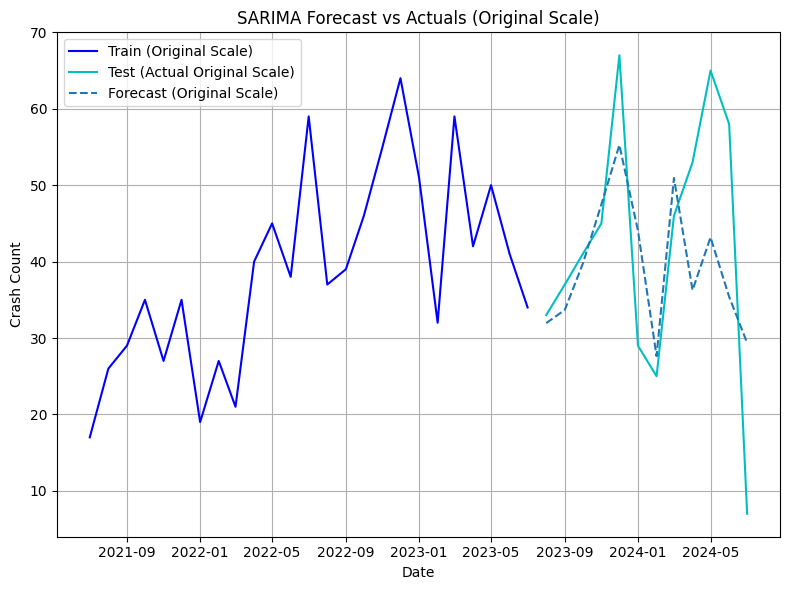

In [ ]:

# Forecast into test period on the log scale
forecast_log = final_fit.forecast(steps=len(test))
forecast_log.index = test.index

# Inverse transform the forecast to the original scale
forecast_original_scale = np.exp(forecast_log)  # Use expm1 to reverse the log1p transformation

# Inverse transform the train and test data back to the original scale for plotting
train_original_scale = np.exp(train['y']) # Use expm1 to reverse the log1p transformation
test_original_scale = np.exp(test['y'])  # Use expm1 to reverse the log1p transformation


# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_original_scale.index, train_original_scale, label='Train (Original Scale)', color='blue')
plt.plot(test.index, test_original_scale, label='Test (Actual Original Scale)', color='c')
plt.plot(forecast_original_scale.index, forecast_original_scale, label='Forecast (Original Scale)', color='#1f77b4', linestyle='--')
plt.title('SARIMA Forecast vs Actuals (Original Scale)')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.grid(True)
# plt.savefig('sarima_forecast_vs_actuals_ADAS.png', dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.show()

In [ ]:
# monthly_df

In [ ]:
len(test), len(train)

(13, 24)

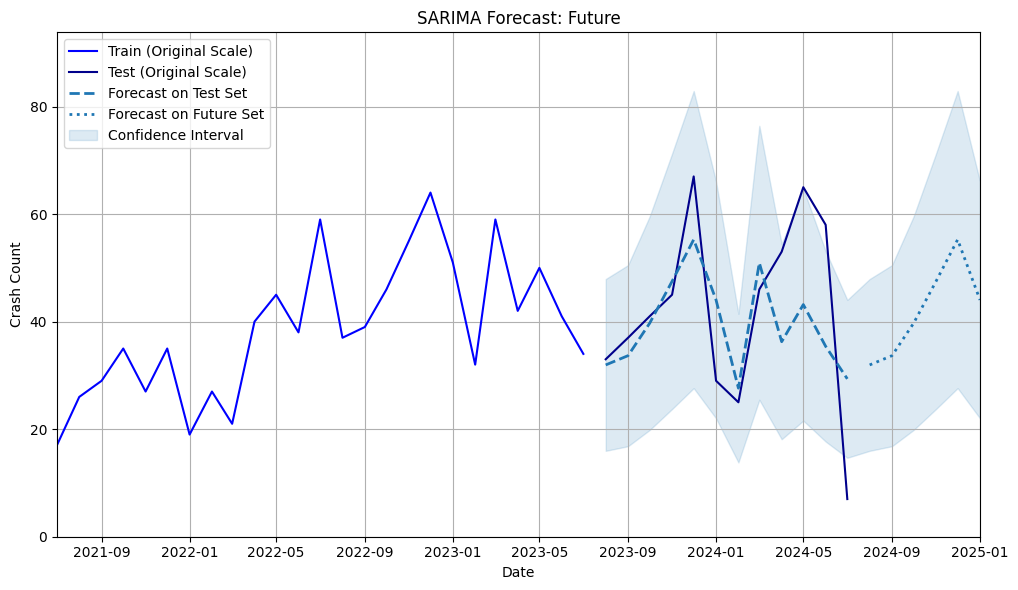

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === 1. Select best model ===
best_order = best_result['params']['order']
best_seasonal_order = best_result['params']['seasonal_order']

# === 2. Refit on full training data ===
final_model = SARIMAX(train['y'], order=best_order, seasonal_order=best_seasonal_order,
                      enforce_stationarity=False, enforce_invertibility=False)
final_fit = final_model.fit(disp=False)

# === 3. Forecast into test period ===
test_steps = len(test)
forecast_test_log = final_fit.get_forecast(steps=test_steps)
forecast_test_df = forecast_test_log.summary_frame()
forecast_test_mean = forecast_test_df['mean']

# === 4. Forecast into future period ===
target_end_date = pd.to_datetime('2025-01-01')
start_future_date = test.index[-1] + pd.offsets.MonthBegin(1)
future_dates = pd.date_range(start=start_future_date, end=target_end_date, freq='MS')
future_steps = len(future_dates)

forecast_future_log = final_fit.get_forecast(steps=future_steps)
forecast_future_df = forecast_future_log.summary_frame()
forecast_future_mean = forecast_future_df['mean']
forecast_future_mean.index = future_dates

# === 5. Combine test + future forecast ===
combined_forecast_log = pd.concat([forecast_test_mean, forecast_future_mean])
combined_forecast_original = np.exp(combined_forecast_log)

# === 6. Custom confidence intervals (±50%) ===
custom_lower = combined_forecast_original * 0.4
custom_upper = combined_forecast_original * 1.8

# === 7. Inverse transform actuals ===
train_original = np.exp(train['y'])
test_original = np.exp(test['y'])

plt.figure(figsize=(10, 6))

# Plot training data
plt.plot(train_original.index, train_original, label='Train (Original Scale)', color='blue')

# Plot actual test data
plt.plot(test_original.index, test_original, label='Test (Original Scale)', color='darkblue')

# Plot forecast on test set (dashed)
plt.plot(forecast_test_mean.index, np.exp(forecast_test_mean), label='Forecast on Test Set', color='#1f77b4', linestyle='--', linewidth=2)

# Plot forecast on future set (dotted)
plt.plot(forecast_future_mean.index, np.exp(forecast_future_mean), label='Forecast on Future Set', color='#1f77b4', linestyle=':', linewidth=2)

# Confidence interval for combined forecast
combined_forecast_original = pd.concat([np.exp(forecast_test_mean), np.exp(forecast_future_mean)])
custom_lower = combined_forecast_original * 0.5
custom_upper = combined_forecast_original * 1.5
plt.fill_between(combined_forecast_original.index, custom_lower, custom_upper, color='#1f77b4', alpha=0.15, label='Confidence Interval')

# Final formatting
plt.title('SARIMA Forecast: Future')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(train_original.index.min(), target_end_date)
plt.ylim(0, max(train_original.max(), test_original.max(), combined_forecast_original.max()) * 1.4)
# plt.savefig('sarima_forecast_test_future_ADAS.png', dpi=300, bbox_inches='tight')

plt.show()

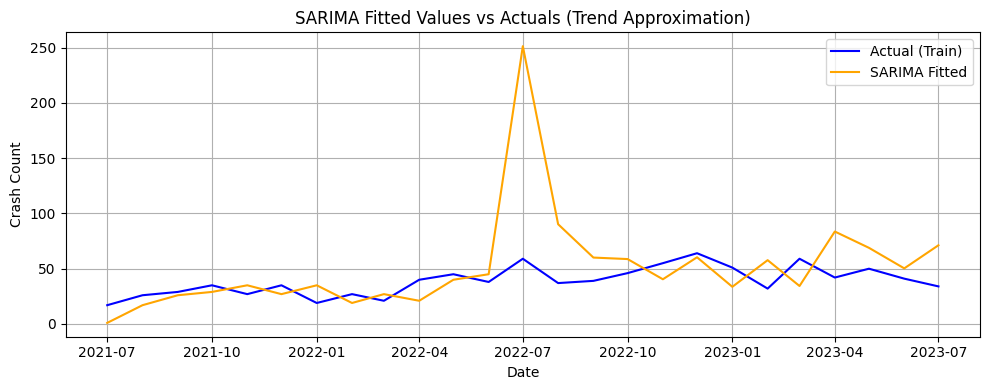

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_original_scale, label='Actual (Train)', color='blue')
plt.plot(final_fit.fittedvalues.index, np.exp(final_fit.fittedvalues), label='SARIMA Fitted', color='orange')
plt.title('SARIMA Fitted Values vs Actuals (Trend Approximation)')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('sarima_fitted_vs_actuals_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()

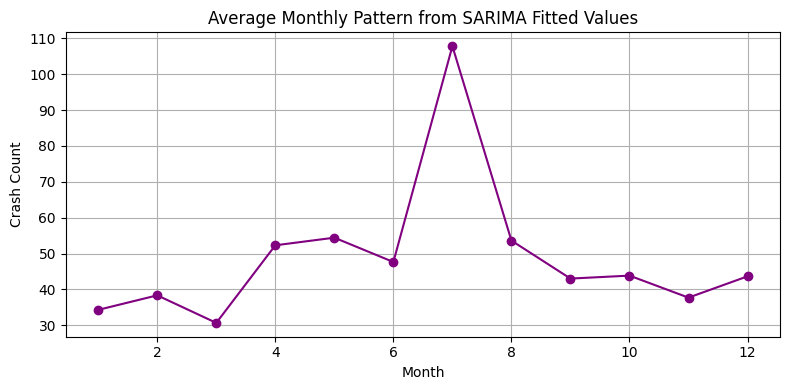

In [ ]:
fitted_original_scale = np.exp(final_fit.fittedvalues)
monthly_pattern = fitted_original_scale.groupby(fitted_original_scale.index.month).mean()

plt.figure(figsize=(8, 4))
monthly_pattern.plot(marker='o', color='purple')
plt.title('Average Monthly Pattern from SARIMA Fitted Values')
plt.xlabel('Month')
plt.ylabel('Crash Count')
plt.grid(True)
plt.tight_layout()
# plt.savefig('average_monthly_pattern_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()

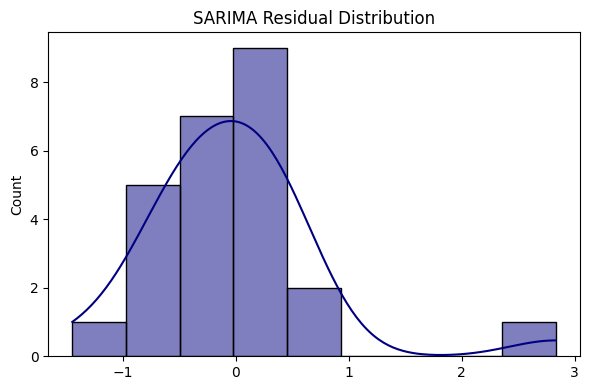

In [ ]:
# import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# residuals = final_fit.resid.dropna()

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='navy')
plt.title('SARIMA Residual Distribution')
plt.tight_layout()
plt.savefig('sarima_residual_distribution_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()

# # Q-Q Plot
# sm.qqplot(residuals, line='s')
# plt.title('Q-Q Plot of SARIMA Residuals')
# plt.tight_layout()
# plt.savefig('sarima_qq_plot_ADAS.png', dpi=300, bbox_inches='tight')
# plt.show()

# # ACF and PACF
# # Reduce the number of lags to be less than the number of observations
# nobs_residuals = len(residuals)
# lags_acf_pacf = min(30, nobs_residuals - 1) # Ensure lags is less than the number of observations
# lags_pacf = min(30, int(nobs_residuals / 2) - 1) # Ensure lags is less than half the sample size for PACF

# plot_acf(residuals, lags=lags_acf_pacf)
# plt.title('ACF of SARIMA Residuals')
# plt.tight_layout()
# plt.savefig('acf_residuals_ADAS.png', dpi=300, bbox_inches='tight')
# plt.show()

# plot_pacf(residuals, lags=lags_pacf)
# plt.title('PACF of SARIMA Residuals')
# plt.tight_layout()
# plt.savefig('pacf_residuals_ADAS.png', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
monthly_df['y'].unique()


array([17, 26, 29, 35, 27, 19, 21, 40, 45, 38, 59, 37, 39, 46, 55, 64, 51,
       32, 42, 50, 41, 34, 33, 67, 25, 53, 65, 58,  7])

In [ ]:
# from prophet import Prophet
# from sklearn.metrics import mean_absolute_error
# import matplotlib.pyplot as plt
# import pandas as pd

# df= pd.read_csv (r'/content/4 ADAS.csv')
# # Load and prepare data
# df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# # Group by Incident Date and Accident Type
# ts_df = df.groupby(['Incident Date', 'Accident Type']).size().reset_index(name='Count')

# # Convert to monthly frequency
# ts_df['Month'] = ts_df['Incident Date'].dt.to_period('M').dt.to_timestamp()
# monthly_df = ts_df.groupby(['Month', 'Accident Type'])['Count'].sum().reset_index()

# # Prepare data for Prophet (requires 'ds' and 'y' columns)
# prophet_df = monthly_total.copy()
# prophet_df.reset_index(inplace=True)
# prophet_df.rename(columns={'ds': 'ds', 'y': 'y'}, inplace=True)

# # Split data into train and test sets (this split is for calculating MAE on the test set)
# train_prophet = prophet_df[prophet_df['ds'] < '2023-08-01']
# test_prophet = prophet_df[(prophet_df['ds'] >= '2023-08-01')]

# # Initialize and fit the Prophet model with US holidays
# model = Prophet(yearly_seasonality=True) # Assuming yearly seasonality
# model.add_country_holidays(country_name='US')
# model.fit(train_prophet) # Fit the model on the entire dataset for future forecasting

# # Create future dataframe for forecasting (including periods beyond the historical data)
# future_periods = 6  # Forecast for the next 12 months after the historical data ends
# # The make_future_dataframe function starts from the last date in the training data
# future = model.make_future_dataframe(periods=future_periods, freq='MS')

# # Make predictions
# forecast_prophet = model.predict(future)

# # --- Alternative MAE Calculation and Plotting ---

# # Align test data with forecast based on 'ds'
# # Ensure 'ds' is the index for easier alignment
# test_prophet_indexed = test_prophet.set_index('ds')
# forecast_prophet_indexed = forecast_prophet.set_index('ds')

# # Select the forecast data that corresponds to the test period
# forecast_test_period = forecast_prophet_indexed.loc[test_prophet_indexed.index, 'yhat']

# # Calculate MAE by comparing aligned series
# mae_prophet = mean_absolute_error(test_prophet_indexed['y'], forecast_test_period)
# mape_prophet = mean_absolute_percentage_error(test_prophet_indexed['y'], forecast_test_period)
# rmse_prophet = mean_squared_error(test_prophet_indexed['y'], forecast_test_period)
# # Theil's U1 calculation
# numerator = np.sqrt(np.mean((forecast_test_period - test_prophet_indexed['y'])**2))
# denominator = np.sqrt(np.mean(forecast_test_period**2)) + np.sqrt(np.mean(test_prophet_indexed['y']**2))
# theils_u1 = numerator / denominator if denominator != 0 else np.nan

# print(f"📊 Prophet Model Theil's U1 (on test set 2023-07 to 2024-07): {theils_u1:.4f}")

# print(f"✅ Prophet Model MAE with US Holidays (on test set 2023-07 to 2024-07): {mae_prophet:.4f}")
# print(f"✅ Prophet Model RMSE with US Holidays (on test set 2023-07 to 2024-07): {rmse_prophet:.4f}")
# print(f"✅ Prophet Model MAPE with US Holidays (on test set 2023-07 to 2024-07): {mape_prophet:.4f}")

# # Plot the forecast using Prophet's built-in plot function
# fig, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes to plot on
# model.plot(forecast_prophet, ax=ax) # Plot Prophet's forecast

# # Plot actual test data points on the same axes
# ax.scatter(test_prophet['ds'], test_prophet['y'], color='red', label='Actual (Test Data)')

# plt.title('Prophet Forecast with US Holidays (Including Future) and Actuals')
# plt.xlabel('Date')
# plt.ylabel('Crash Count')
# plt.legend() # Add legend to show 'Actual (Test Data)'
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Plot the components
# fig2 = model.plot_components(forecast_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgilwg76u/4hw2c_mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgilwg76u/51_fv8x3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87086', 'data', 'file=/tmp/tmpgilwg76u/4hw2c_mc.json', 'init=/tmp/tmpgilwg76u/51_fv8x3.json', 'output', 'file=/tmp/tmpgilwg76u/prophet_modelkd6ckd0f/prophet_model-20250903152739.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:

📊 Prophet Model Theil's U1 (on test set): 0.2595
✅ Prophet Model MAE (on test set): 21.3143
✅ Prophet Model RMSE (on test set): 27.5619
✅ Prophet Model MAPE (on test set): 1.1718
✅ Prophet Model SMAPE (on test set): 48.5371


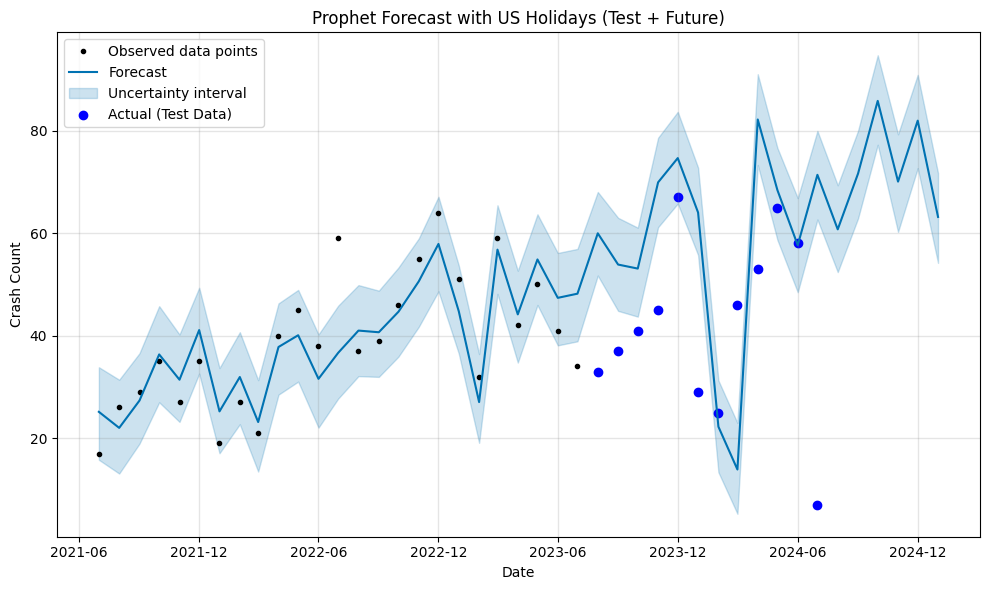

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === 1. Load and prepare data ===
df = pd.read_csv(r'/content/4 ADAS.csv')
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Group by Incident Date and Accident Type
ts_df = df.groupby(['Incident Date', 'Accident Type']).size().reset_index(name='Count')

# Convert to monthly frequency
ts_df['Month'] = ts_df['Incident Date'].dt.to_period('M').dt.to_timestamp()
monthly_df = ts_df.groupby(['Month'])['Count'].sum().reset_index()
monthly_df.rename(columns={'Month': 'ds', 'Count': 'y'}, inplace=True)

# === 2. Train-test split ===
train_prophet = monthly_df[monthly_df['ds'] < '2023-08-01']
test_prophet = monthly_df[monthly_df['ds'] >= '2023-08-01']

# === 3. Initialize and fit Prophet model ===
model = Prophet(yearly_seasonality=True)
model.add_country_holidays(country_name='US')
model.fit(train_prophet)

# === 4. Create future dataframe to cover test + future period ===
test_horizon = len(test_prophet)
future_periods = test_horizon + 6  # 6 months beyond test
future = model.make_future_dataframe(periods=future_periods, freq='MS')

# === 5. Forecast ===
forecast = model.predict(future)

# === 6. Align forecast with test period ===
forecast_indexed = forecast.set_index('ds')
test_indexed = test_prophet.set_index('ds')
forecast_test = forecast_indexed.loc[test_indexed.index, 'yhat']



# === 7. Evaluation metrics ===
mae = mean_absolute_error(test_indexed['y'], forecast_test)
mape = mean_absolute_percentage_error(test_indexed['y'], forecast_test)
rmse = np.sqrt(mean_squared_error(test_indexed['y'], forecast_test))
numerator = np.sqrt(np.mean((forecast_test - test_indexed['y'])**2))
denominator = np.sqrt(np.mean(forecast_test**2)) + np.sqrt(np.mean(test_indexed['y']**2))
theils_u1 = numerator / denominator if denominator != 0 else np.nan

smape = np.mean(2 * np.abs(forecast_test - test_indexed['y']) / (np.abs(forecast_test) + np.abs(test_indexed['y']))) * 100

print(f" Prophet Model Theil's U1 (on test set): {theils_u1:.4f}")
print(f" Prophet Model MAE (on test set): {mae:.4f}")
print(f" Prophet Model RMSE (on test set): {rmse:.4f}")
print(f" Prophet Model MAPE (on test set): {mape:.4f}")
print(f" Prophet Model SMAPE (on test set): {smape:.4f}")

# === 8. Plot forecast and actuals ===
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
ax.scatter(test_indexed.index, test_indexed['y'], color='b', label='Actual (Test Data)')
plt.title('Prophet Forecast with US Holidays (Test + Future)')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('prophet_forecast_test_future_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()

# === 9. Plot components ===
# model.plot_components(forecast)

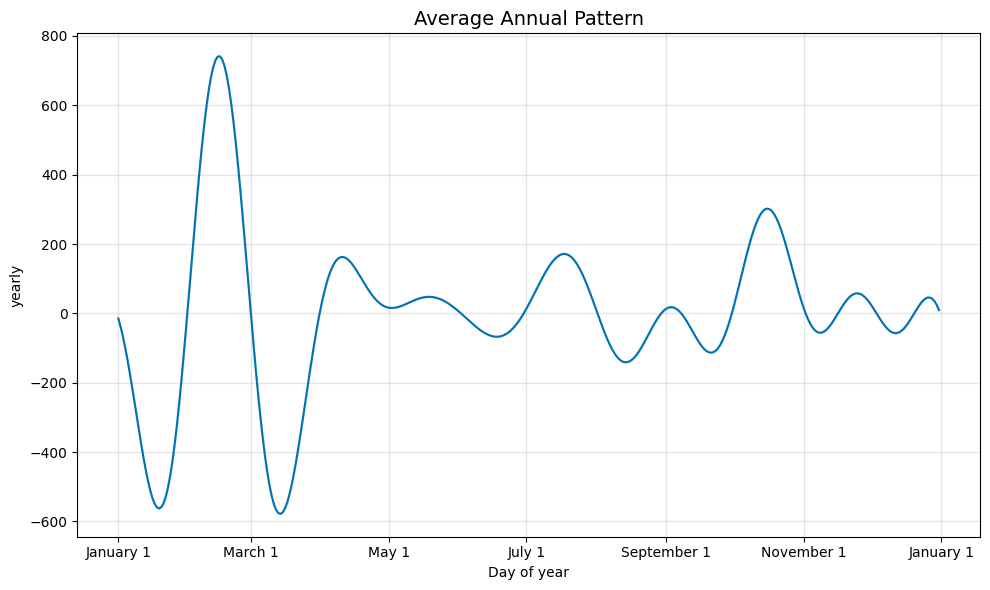

In [ ]:
from prophet.plot import plot_yearly

# Plot yearly seasonality only
fig = plot_yearly(model)
plt.title('Average Annual Pattern', fontsize=14)
plt.tight_layout()
# plt.savefig('average_annual_pattern_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()

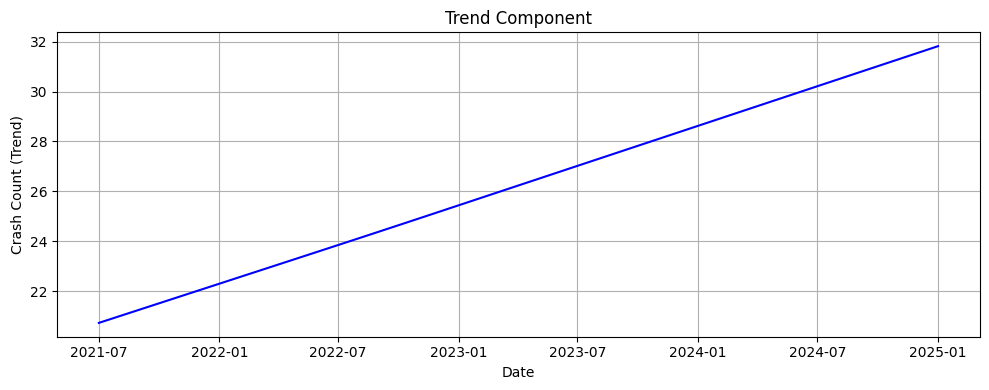

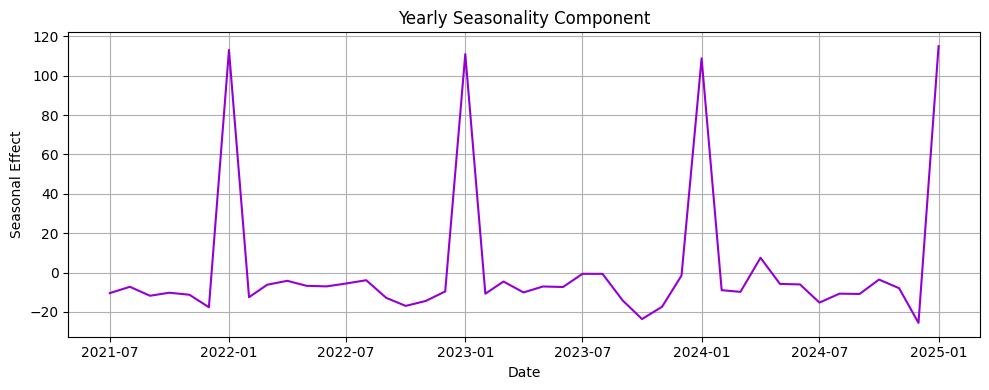

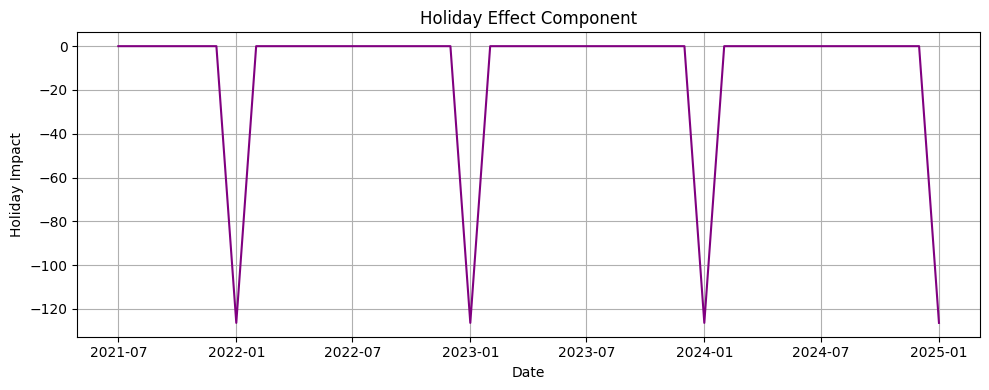

In [ ]:
from prophet.plot import plot_components_plotly
import matplotlib.pyplot as plt

# === 1. Get forecast components ===
forecast_components = forecast[['ds', 'trend', 'yearly', 'holidays']].copy()

# === 2. Plot Trend ===
plt.figure(figsize=(10, 4))
plt.plot(forecast_components['ds'], forecast_components['trend'], color='blue')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Crash Count (Trend)')
plt.grid(True)
plt.tight_layout()
plt.savefig('trend_component_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()

# === 3. Plot Yearly Seasonality ===
plt.figure(figsize=(10, 4))
plt.plot(forecast_components['ds'], forecast_components['yearly'], color='darkviolet')
plt.title('Yearly Seasonality Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.tight_layout()
plt.savefig('yearly_seasonality_component_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()

# === 4. Plot Holiday Effects ===
plt.figure(figsize=(10, 4))
plt.plot(forecast_components['ds'], forecast_components['holidays'], color='purple')
plt.title('Holiday Effect Component')
plt.xlabel('Date')
plt.ylabel('Holiday Impact')
plt.grid(True)
plt.tight_layout()
plt.savefig('holiday_effect_component_ADAS.png', dpi=300, bbox_inches='tight')
plt.show()